# The residuals plot in the paper.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import gridspec

plotpar = {'axes.labelsize': 16,
           'font.size': 22,
           'legend.fontsize': 15,
           'xtick.labelsize': 10,
           'ytick.labelsize': 10,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data file.

In [3]:
df = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,20,21,22,28,30,54,55,56,74,76,155,156,176) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Load the results file.

In [4]:
results = pd.read_csv("../data/all_kepler3.csv")

In [5]:
results

,Unnamed: 0,Unnamed: 0.1,kepid,vx_inferred,vx_inferred_errp,vx_inferred_errm,vx_inferred_err,vx_random,vy_inferred,vy_inferred_errp,...,vz_inferred,vz_inferred_errp,vz_inferred_errm,vz_inferred_err,vz_random,lndistance_inferred,lndistance_inferred_errp,lndistance_inferred_errm,lndistance_inferred_err,lndistance_random
0,0,0,7935706,43.701342,5.179950,5.086387,5.177257,41.548623,216.677216,16.602583,...,11.556899,6.448254,6.334363,6.424540,4.272105,-1.041775,0.008259,0.008332,0.008350,-1.032731
1,0,0,7935740,-15.967008,5.107373,5.324196,5.217616,-13.822299,232.487083,16.616221,...,-4.911967,6.456237,6.586773,6.476872,-9.380386,-0.589679,0.014112,0.014158,0.014282,-0.582068
2,0,0,7728958,54.577350,5.520754,5.578945,5.573086,53.672860,203.696769,16.701537,...,23.579477,6.563984,6.502784,6.549424,27.723185,0.196647,0.028820,0.028128,0.029007,0.221769
3,0,0,7935781,16.798886,5.106930,5.174182,5.176765,14.385074,237.024176,16.309557,...,-15.030467,6.301716,6.497485,6.409090,-24.793709,0.199221,0.022076,0.021705,0.021672,0.218697
4,0,0,7581142,147.899851,8.237028,7.901445,8.203824,145.035029,196.970890,16.671270,...,21.234908,6.483839,6.297080,6.403971,20.316518,0.805573,0.043602,0.043726,0.043601,0.803384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,0,0,1433803,27.473490,6.346151,6.321687,6.521977,NaN,229.172876,17.138145,...,-7.517717,3.100586,3.019193,3.174004,NaN,-0.932758,0.010705,0.010415,0.010554,NaN
4983,0,0,2714397,128.525651,8.408329,7.634472,8.126624,NaN,221.193142,17.710819,...,-15.311203,3.442490,3.361052,3.459273,NaN,-0.046077,0.043261,0.040915,0.041866,NaN
4984,0,0,2991027,158.699431,12.424216,11.451812,12.091399,NaN,214.504885,17.986688,...,-9.591876,3.482368,3.633576,3.578942,NaN,1.325285,0.067020,0.064789,0.066323,NaN
4985,0,0,4365609,20.644897,6.070911,5.866896,5.961923,NaN,215.013234,18.464052,...,26.987782,3.761300,3.747856,3.767374,NaN,0.748472,0.050113,0.047575,0.048190,NaN


Merge the results file and the data file.

In [6]:
adf = pd.merge(df, results, on="kepid", how="right")

In [7]:
def resid_plot(vx, vy, vz, vx_inferred, vy_inferred, vz_inferred, vx_inferred_err, vy_inferred_err, vz_inferred_err,
               r_est, lndistance_inferred,
               ms=2, alpha=.1, box_size=150):

    fig = plt.figure(figsize=(16, 6), dpi=200)
#     gs = gridspec.GridSpec(2, 3, hspace=.0, wspace=.3, height_ratios=[1, 1])
    gs = gridspec.GridSpec(2, 4, hspace=.0, wspace=.4, height_ratios=[1, 1])

    ax0 = plt.subplot(gs[0, 0])
    xlims = (np.median(vx) - box_size, np.median(vx_inferred) + box_size)
    ax0.plot(vx, vx_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(xlims[0], xlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax0.set_ylim(xlims)
    ax0.set_xlim(xlims)
    ax0.set_ylabel("$\mathrm{V_x~inferred~[kms^{-1}]}$")
    ax0.set_xticklabels([])

    ax1 = plt.subplot(gs[0, 1])
    ylims = (np.median(vy) - box_size, np.median(vy_inferred) + box_size)
    ax1.plot(vy, vy_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(ylims[0], ylims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax1.set_xlim(ylims)
    ax1.set_ylim(ylims)
    ax1.set_ylabel("$\mathrm{V_y~inferred~[kms^{-1}]}$")
    ax1.set_xticklabels([])

    ax2 = plt.subplot(gs[0, 2])
    zlims = (np.median(vz) - box_size, np.median(vz_inferred) + box_size)
    ax2.plot(vz, vz_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(zlims[0], zlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax2.set_xlim(zlims)
    ax2.set_ylim(zlims)
    ax2.set_ylabel("$\mathrm{V_z~inferred~[kms^{-1}]}$");
    ax2.set_xticklabels([])

    ax6 = plt.subplot(gs[0, 3])
    ax6.plot(r_est, lndistance_inferred, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(min(lndistance_inferred), max(lndistance_inferred), 100)
    ax6.plot(xs, xs, "k", ls="--", zorder=1)
    ax6.set_ylabel("$\mathrm{\ln(D/Kpc)~inferred}$")
    
    # Residual panels
    # ---------------------------------------------------------------------------------------------------
    
    ax3 = plt.subplot(gs[1, 0])
    ax3.plot(vx, vx_inferred - vx, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax3.errorbar(np.median(vx - 40), -30, yerr=np.median(vx_inferred_err), fmt="k.", label="$\mathrm{Typical~uncertainty}$")
    ax3.axhline(0, color="k", ls="--", zorder=1)
    ax3.set_ylim(-box_size, box_size)
    ax3.set_xlim(xlims)
    ax3.set_xlabel("$\mathrm{V_x~true~[kms^{-1}]}$")
#     ax3.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax3.set_ylabel("$\mathrm{Inferred-True}$")
    ax3.legend()

    ax4 = plt.subplot(gs[1, 1])
    ax4.plot(vy, vy_inferred-vy, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax4.errorbar(np.median(vy - 40), -30, yerr=np.median(vy_inferred_err), fmt="k.")
    ax4.axhline(0, color="k", ls="--", zorder=1)
    ax4.set_ylim(-box_size, box_size)
    ax4.set_xlim(ylims)
    ax4.set_xlabel("$\mathrm{V_y~true~[kms^{-1}]}$")
#     ax4.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax4.set_ylabel("$\mathrm{Inferred-True}$")

    ax5 = plt.subplot(gs[1, 2])
    ax5.plot(vz, vz_inferred - vz, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax5.errorbar(np.median(vz - 40), -30, yerr=np.median(vz_inferred_err), fmt="k.")
    print("typical vz uncertainty = ", np.median(vz_inferred_err), np.median(vz_inferred_err/vz)*100)
    ax5.axhline(0, color="k", ls="--", zorder=1)
    ax5.set_ylim(-box_size, box_size)
    ax5.set_xlim(zlims)
    ax5.set_xlabel("$\mathrm{V_z~true~[kms^{-1}]}$")
#     ax5.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax5.set_ylabel("$\mathrm{Inferred-True}$")

    ax7 = plt.subplot(gs[1, 3])
    ax7.plot(r_est, lndistance_inferred-r_est, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax7.axhline(0, color="k", ls="--", zorder=1)
    ax7.set_ylim(-.5, .5)
    ax7.set_xlabel("$\mathrm{\ln(D/Kpc)~true}$")
    ax7.set_ylabel("$\mathrm{Inferred-True}$")
        
    return fig

typical vz uncertainty =  5.079645090679055 6.902997692430126


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if sys.path[0] == '':


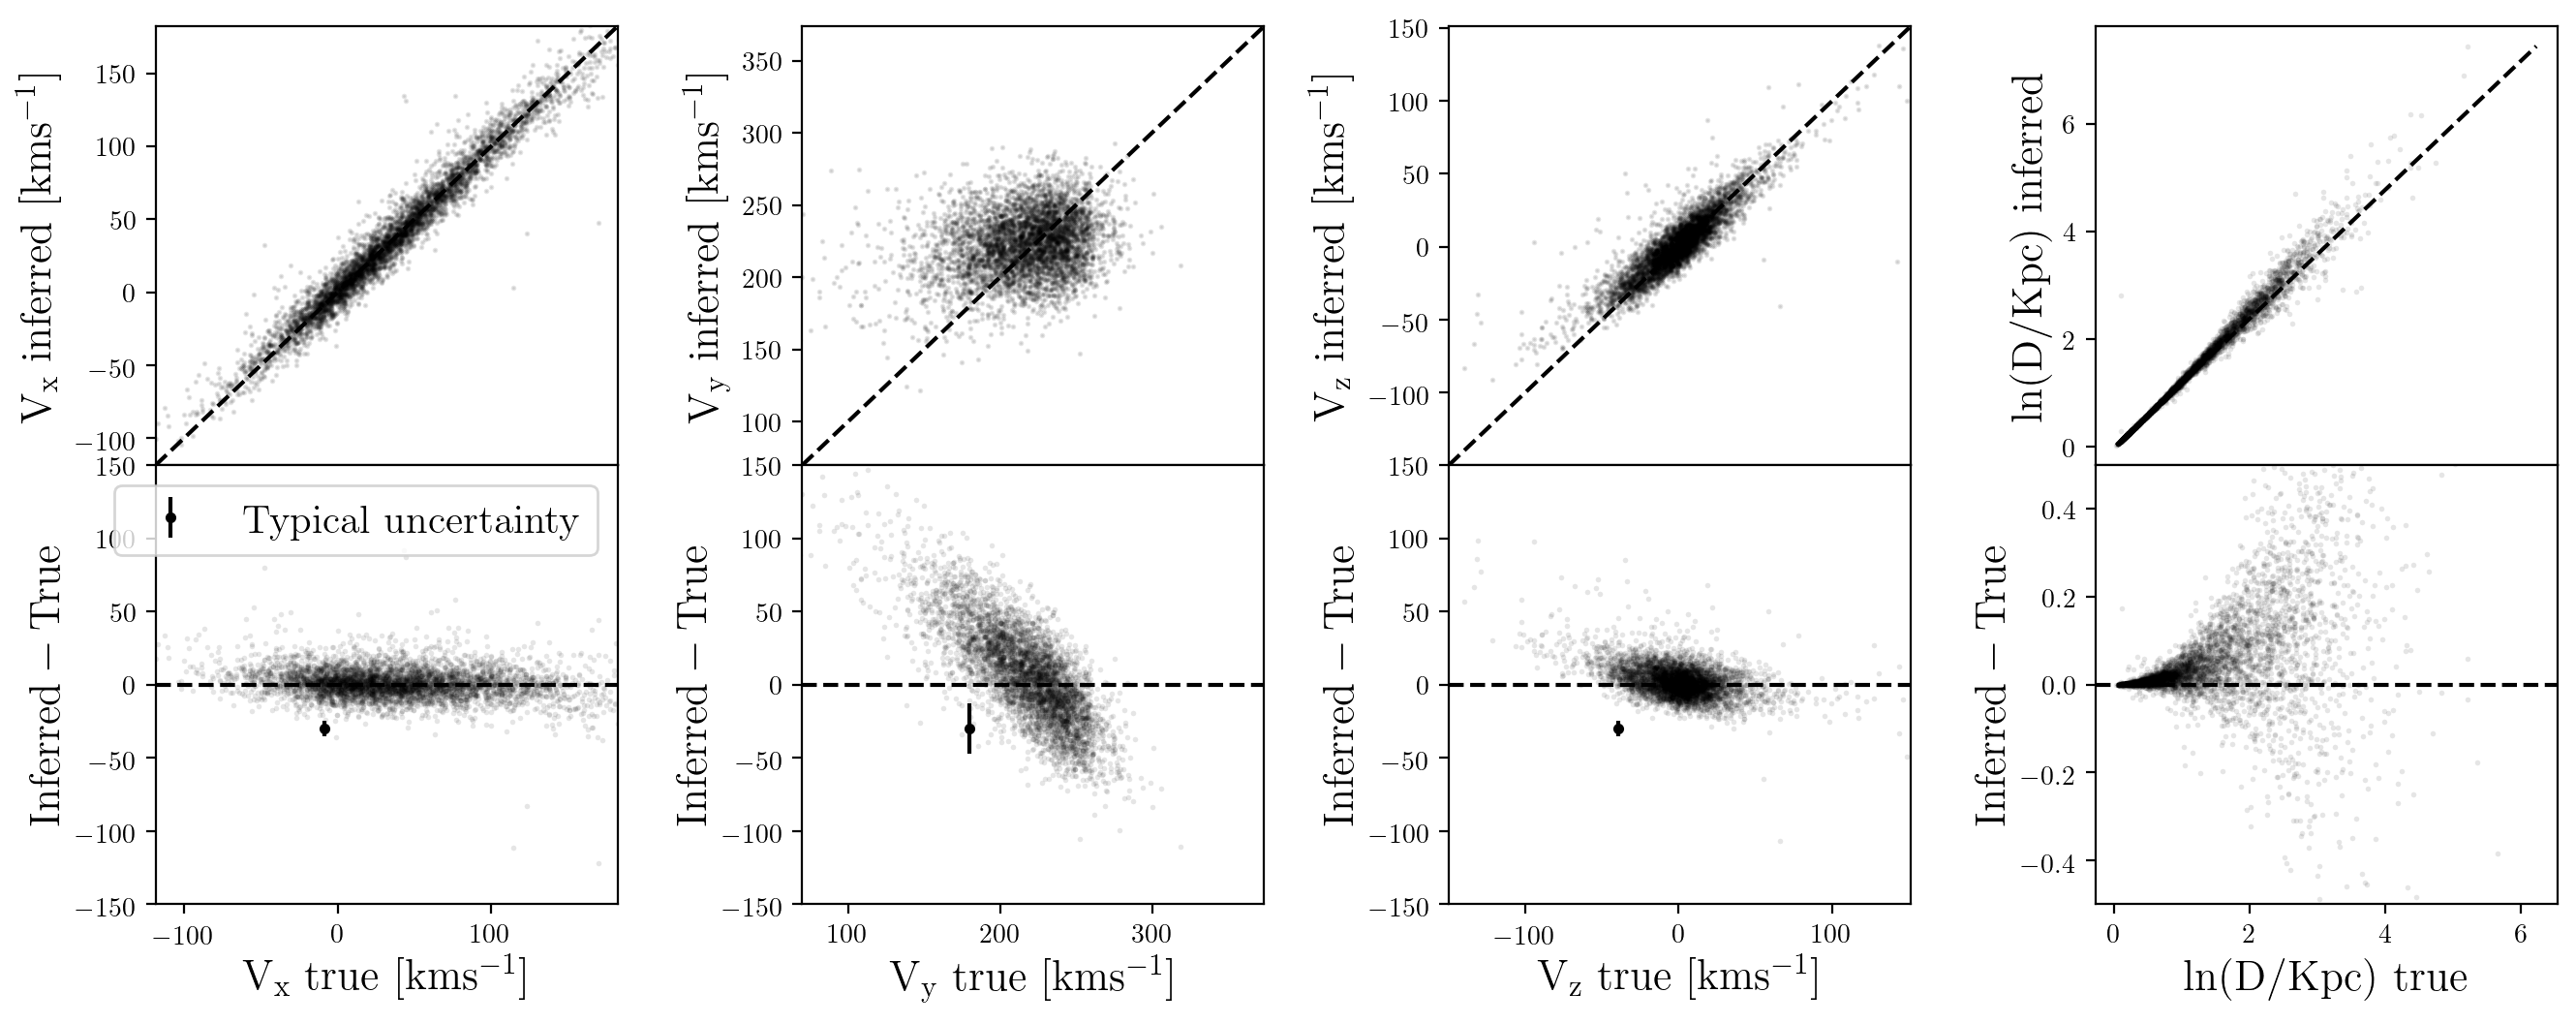

In [8]:
m = np.isfinite(adf.vx.values) & np.isfinite(adf.vy.values) & np.isfinite(adf.vz.values)
m &= np.isfinite(adf.vx_random.values) & np.isfinite(adf.vy_random.values) & np.isfinite(adf.vz_random.values) & np.isfinite(adf.lndistance_random.values)
# fig = resid_plot(adf.vx.values[m], adf.vy.values[m], adf.vz.values[m], adf.vx_inferred.values[m],
#                  adf.vy_inferred.values[m], adf.vz_inferred.values[m], adf.vx_inferred_err.values[m],
#                  adf.vy_inferred_err.values[m], adf.vz_inferred_err.values[m],
#                  adf.r_est.values[m]*1e-3, np.exp(adf.lndistance_inferred.values[m]))
fig = resid_plot(adf.vx.values[m], adf.vy.values[m], adf.vz.values[m], adf.vx_random.values[m],
                 adf.vy_random.values[m], adf.vz_random.values[m],
                 adf.vx_inferred_err.values[m], adf.vy_inferred_err.values[m], adf.vz_inferred_err.values[m],
                 adf.r_est.values[m]*1e-3, np.exp(adf.lndistance_random.values[m]))

plt.tight_layout()
plt.savefig("../plots/residuals")
plt.savefig("../paper/residuals.pdf")

In [9]:
print(f"Median vx uncertainty = {np.median(adf.vx_inferred_err):.2f} km/s, {np.median(adf.vx_inferred_err)/np.median(adf.vx_inferred)*100:.2f} %")
print(f"Median vy uncertainty = {np.median(adf.vy_inferred_err):.2f} km/s, {np.median(adf.vy_inferred_err)/np.median(adf.vy_inferred)*100:.2f} %")
print(f"Median vz uncertainty = {np.median(adf.vz_inferred_err):.2f} km/s, {np.median(adf.vz_inferred_err)/np.median(adf.vz_inferred)*100:.2f} %")
print(f"Median lnD uncertainty = {np.median(np.exp(adf.lndistance_inferred_err)):.2f} pc, {np.median(adf.lndistance_inferred_err)*100:.2f} %")

Median vx uncertainty = 5.22 km/s, 16.33 %
Median vy uncertainty = 17.40 km/s, 7.75 %
Median vz uncertainty = 5.07 km/s, 464.95 %
Median lnD uncertainty = 1.03 pc, 2.69 %
